# Task 3
Implementate un programma che, data una cartella di immagini e dati l’identificatore ID di una immagine, un modello, e un valore “k”, restituisca e visualizzi le k immagini piu’ simili a quella di identificatore ID sulla base dei corrispondenti descrittori visuali. Per ciascuna immagine restituita, restituire anche il matching score.

In [21]:
from ipynb.fs.full.task1_new import ottieniDescrittore
from ipynb.fs.full.task2 import *

import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

### Implementazione funzione per ottenere le K immagini più simili in base al modello che si vuole utilizzare

> **Nota bene:** La funzione prende in input anche il parametro '*distanceMetric*' in modo tale da poter testare il tutto usando diverse metriche di distanza e visualizzare i diversi risultati ottenuti in modo più comodo e semplice.

In [22]:
# funzione che restituisce le k immagini più simili a quella di id imageID secondo il modelName (color moments, hog, lbp)
# parametri:
    # imageID: nome del file dell'immagine
    # k: numero di immagini simili che vogliamo ottenere
    # modelName: nome del descrittore che vogliamo calcolare
    # distanceMetric: nome della metrica utilizzata per calcolare la distanza tra le immagini

def getKsimilarImages(imageID, k, modelName, distanceMetric):
    match modelName:
        case 'ColorMoments':
            return calculateDistanceOfColorMoments(imageID, int(k+1), distanceMetric)
            
        case 'LBP':
            return calculateDistanceOfLBP(imageID, int(k+1), distanceMetric)

        case 'HOG':
            return calculateDistanceOfHOG(imageID, int(k+1), distanceMetric)

        case _:
            return "Errore, inserire un descrittore corretto"

### Implementazione di una funzione che restituisce le K immagini più simili sulla base dei Color Moments e usando come metrica di distanza la *distanceMetric* passata in input

In [23]:
def calculateDistanceOfColorMoments(imageID, k, distanceMetric):
    colorMomentsOfInputImage = dictionaryOfColorMomentsDescriptors[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    print(colorMomentsOfImage)

    dictionaryOfDistances = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(dictionaryOfColorMomentsDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(numpyArr, numpyArrOfV)   # calcolo la distanza di hamming tra i due descrittori
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(numpyArr, numpyArrOfV)   # calcolo la distanza di manhattan tra i due descrittori
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(numpyArr, numpyArrOfV, 3)   # calcolo la distanza di minkowski con p=3 tra i due descrittori

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))     # riordino le distanze dalla più piccola alla più grande

    firstK = sortedDistances[:int(k)]   # recupero le prime k immagini, ovvero le k immagini con distanza inferiore

    print(firstK)

    return firstK

### Implementazione di una funzione che restituisce le K immagini più simili sulla base delle features LBP e usando come metrica di distanza la *distanceMetric* passata in input

# TODO: IMPLEMENT ME

In [24]:
#TODO: calcolare la distanza usando LBP

def calculateDistanceOfLBP(imageID, k, distanceMetric):
    return


### Implementazione di una funzione che restituisce le K immagini più simili sulla base delle HOG features e usando come metrica di distanza la *distanceMetric* passata in input

In [25]:
# la prima immagine presente nell'array in output è sempre l'immagine in input, la quale ha distanza 0 da sè stessa
from scipy.spatial import distance

def calculateDistanceOfHOG(imageID, k, distanceMetric):
    HOGOfInputImage = dictionaryOfHOGDescriptors[imageID]
    numpyArr = np.array(HOGOfInputImage)

    print(HOGOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfHOGDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(numpyArr - numpyArrOfV)    # calcolo la distanza euclidea tra i due descrittori
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(numpyArr, numpyArrOfV)    # calcolo la distanza di hamming tra i due descrittori
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(numpyArr, numpyArrOfV)    # calcolo la distanza di manhattan tra i due descrittori
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(numpyArr, numpyArrOfV, 3)   # calcolo la distanza di minkowski con p=3 tra i due descrittori

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))    # riordino le distanze dalla più piccola alla più grande

    firstK = sortedDistances[:int(k)]   # recupero le prime k immagini, ovvero le k immagini con distanza inferiore

    print(firstK)

    return firstK


### Test recupero K immagini più simili a quella in input usando i Color Moments e la distanza passata in input

[199.8721301020408, 28.80876738707981, -0.3479476574512834]
[('image-0.png', 0.0), ('image-249.png', 3.6544776317899124), ('image-28.png', 3.7528087306374496), ('image-58.png', 3.9973771091008983), ('image-9.png', 4.142853671660872), ('image-8.png', 4.149398659566391), ('image-242.png', 4.455238839535369), ('image-6.png', 4.658142352835748), ('image-227.png', 4.821622240636646), ('image-66.png', 4.961725832192609), ('image-256.png', 4.9669408664170955)]
Nome dell'immagine:  image-0.png
Color moments dell'immagine:  [186.03316326530611, 19.96503485319131, -0.2095598147422733]
Distanza dall'immagine in input:  0.0


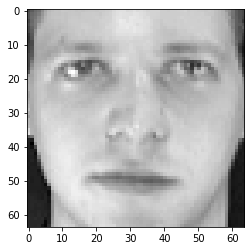

Nome dell'immagine:  image-249.png
Color moments dell'immagine:  [183.12723214285714, 22.86018971819917, -0.28290320419125126]
Distanza dall'immagine in input:  3.6544776317899124


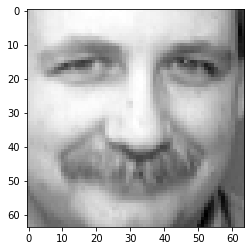

Nome dell'immagine:  image-28.png
Color moments dell'immagine:  [186.68973214285714, 23.711023767150074, -0.3756695796163702]
Distanza dall'immagine in input:  3.7528087306374496


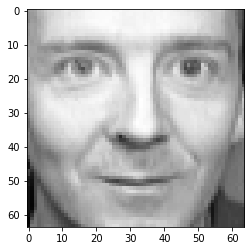

Nome dell'immagine:  image-58.png
Color moments dell'immagine:  [182.38679846938774, 22.45187318166294, -0.4428002644893794]
Distanza dall'immagine in input:  3.9973771091008983


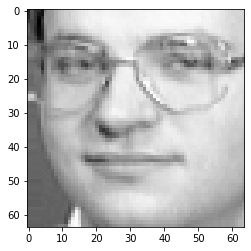

Nome dell'immagine:  image-9.png
Color moments dell'immagine:  [182.3577806122449, 22.743643982733467, -0.35962822929184407]
Distanza dall'immagine in input:  4.142853671660872


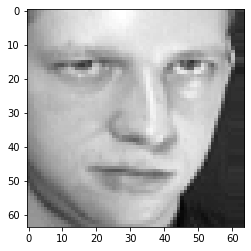

Nome dell'immagine:  image-8.png
Color moments dell'immagine:  [182.61352040816325, 23.121584683078616, -0.33340613333393543]
Distanza dall'immagine in input:  4.149398659566391


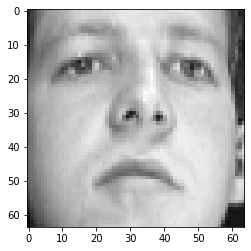

Nome dell'immagine:  image-242.png
Color moments dell'immagine:  [182.34406887755102, 23.333644988915818, -0.30515768292001577]
Distanza dall'immagine in input:  4.455238839535369


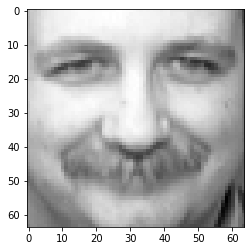

Nome dell'immagine:  image-6.png
Color moments dell'immagine:  [190.5765306122449, 21.9036709630031, -0.3486587137982563]
Distanza dall'immagine in input:  4.658142352835748


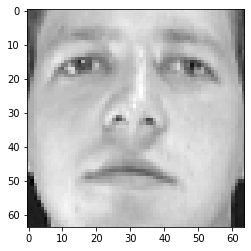

Nome dell'immagine:  image-227.png
Color moments dell'immagine:  [190.8450255102041, 20.84301944840213, -0.34572908055451473]
Distanza dall'immagine in input:  4.821622240636646


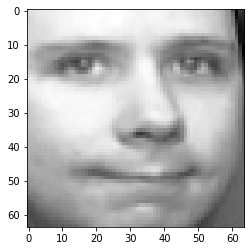

Nome dell'immagine:  image-66.png
Color moments dell'immagine:  [181.3252551020408, 22.575773756904272, -0.4153333499457962]
Distanza dall'immagine in input:  4.961725832192609


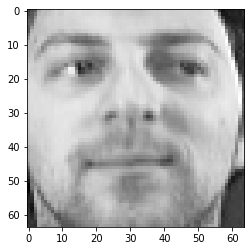

Nome dell'immagine:  image-256.png
Color moments dell'immagine:  [190.68080357142858, 22.77314445220778, -0.33547821769292513]
Distanza dall'immagine in input:  4.9669408664170955


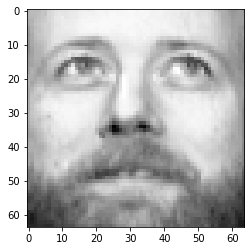

In [26]:
kSimilarImagesOfColorMoments = getKsimilarImages('image-0.png', 10, 'ColorMoments', 'Minkowski')

for i in range(0, len(kSimilarImagesOfColorMoments)):
    imageName = kSimilarImagesOfColorMoments[i][0]
    print("Nome dell'immagine: ", kSimilarImagesOfColorMoments[i][0])
    print("Color moments dell'immagine: ", dictionaryOfColorMomentsDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfColorMoments[i][1])

    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()

In [27]:
inputImage = 'image-0.png'

### Recupero delle K immagini più simili a quella in input usando i Color Moments e le diverse metriche di distanza definite

> **Nota bene:** L'algoritmo itera richiamando la procedura per ottenere le K immagini più simili tante volte quante sono le distanze elencate nell'array *distanceMetrics*

[199.8721301020408, 28.80876738707981, -0.3479476574512834]
[('image-0.png', 0.0), ('image-1.png', 1.0), ('image-10.png', 1.0), ('image-100.png', 1.0), ('image-101.png', 1.0), ('image-102.png', 1.0)]
[199.8721301020408, 28.80876738707981, -0.3479476574512834]
[('image-0.png', 0.0), ('image-28.png', 4.568667556383886), ('image-227.png', 5.8260161059210445), ('image-249.png', 5.874429376905815), ('image-229.png', 6.158428858981051), ('image-96.png', 6.264674074988711)]
[199.8721301020408, 28.80876738707981, -0.3479476574512834]
[('image-0.png', 0.0), ('image-28.png', 3.8067188086930073), ('image-249.png', 4.102649952600406), ('image-58.png', 4.419812462567461), ('image-9.png', 4.609948684122599), ('image-8.png', 4.655437896653599)]
[199.8721301020408, 28.80876738707981, -0.3479476574512834]
[('image-0.png', 0.0), ('image-249.png', 3.6544776317899124), ('image-28.png', 3.7528087306374496), ('image-58.png', 3.9973771091008983), ('image-9.png', 4.142853671660872), ('image-8.png', 4.14939865

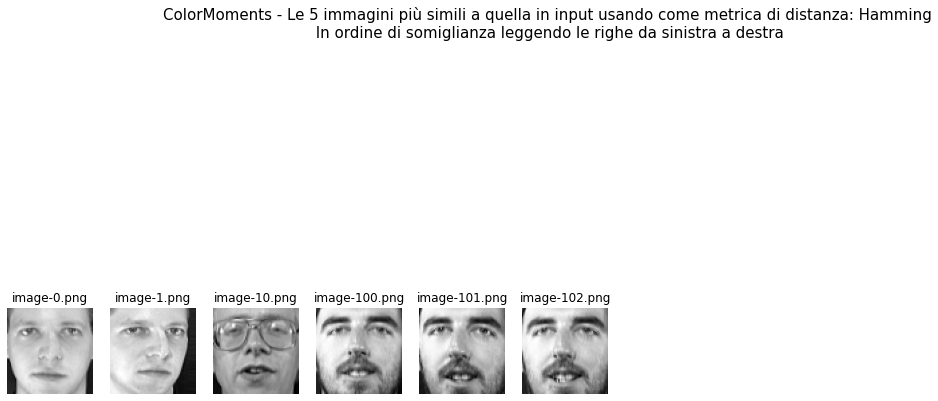

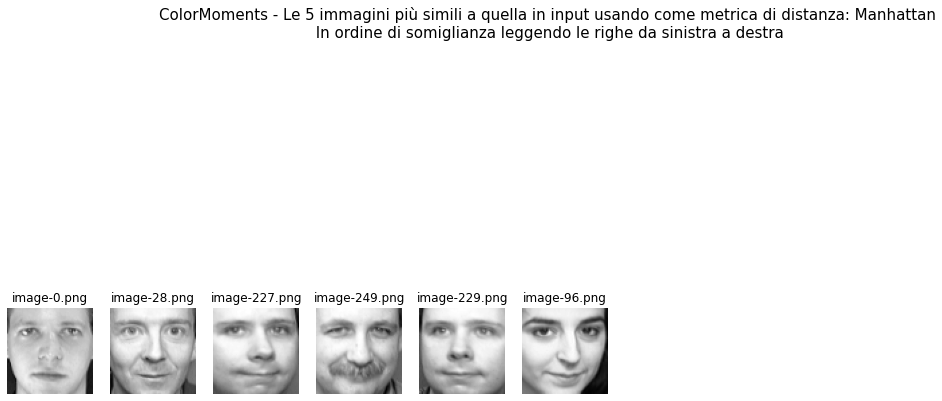

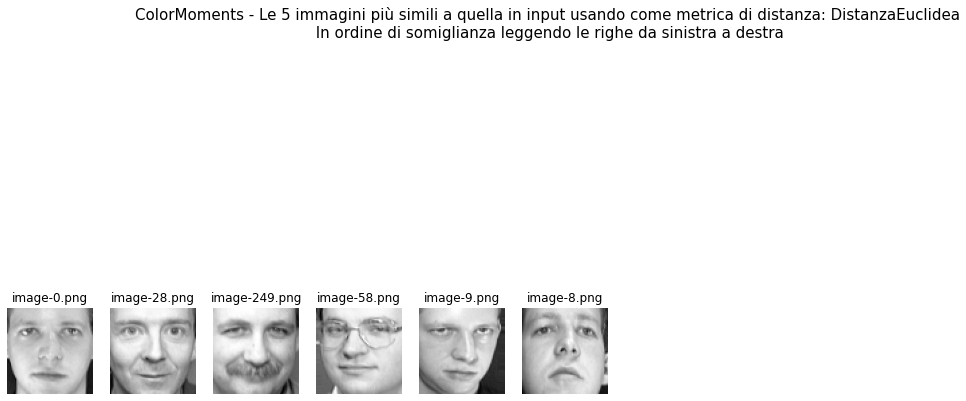

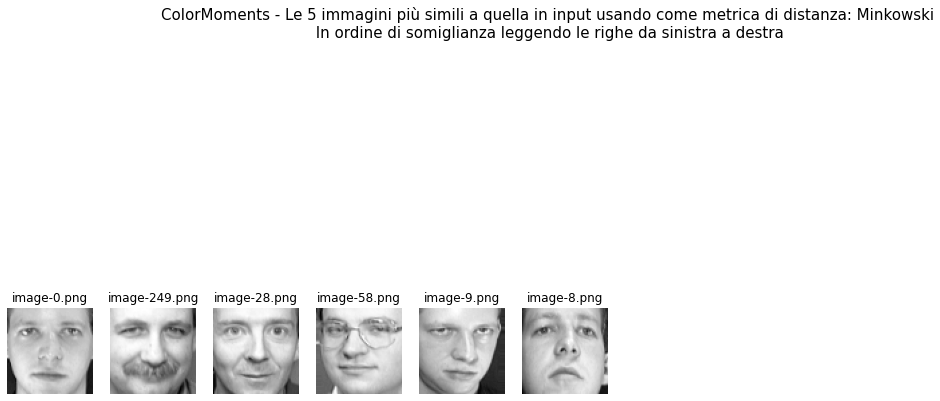

In [28]:
distanceMetrics = ['Hamming', 'Manhattan', 'DistanzaEuclidea', 'Minkowski']

import math
# numero di immagini simili che vogliamo ottenere
k = 5

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('ColorMoments - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i] + '\n In ordine di somiglianza leggendo le righe da sinistra a destra', fontsize=15)
    # plt.axis('off')
    currentIndex = 1

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'ColorMoments', distanceMetrics[i])
    #print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, currentIndex)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()



### Recupero delle K immagini più simili a quella in input usando le HOF features e le diverse metriche di distanza definite

> **Nota bene:** L'algoritmo itera richiamando la procedura per ottenere le K immagini più simili tante volte quante sono le distanze elencate nell'array *distanceMetrics*

2
[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-394.png', 0.9716931216931217), ('image-71.png', 0.9716931216931217), ('image-7.png', 0.9735449735449735), ('image-70.png', 0.9735449735449735), ('image-340.png', 0.9751322751322752), ('image-391.png', 0.9761904761904762), ('image-53.png', 0.9761904761904762), ('image-198.png', 0.9764550264550265), ('image-28.png', 0.9764550264550265), ('image-197.png', 0.9767195767195768), ('image-74.png', 0.9767195767195768), ('image-55.png', 0.976984126984127), ('image-59.png', 0.976984126984127), ('image-229.png', 0.9775132275132276)]
[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-7.png', 233.6401485828386), ('image-2.png', 240.943374715284), ('image-159.png', 265.67054347873307), ('image-6.png', 266.90467958013284), ('image-152.png', 269.6770558306073), ('image-151.png', 280.2559802316425), ('image-235.png', 286.3546050034106), ('image-178.

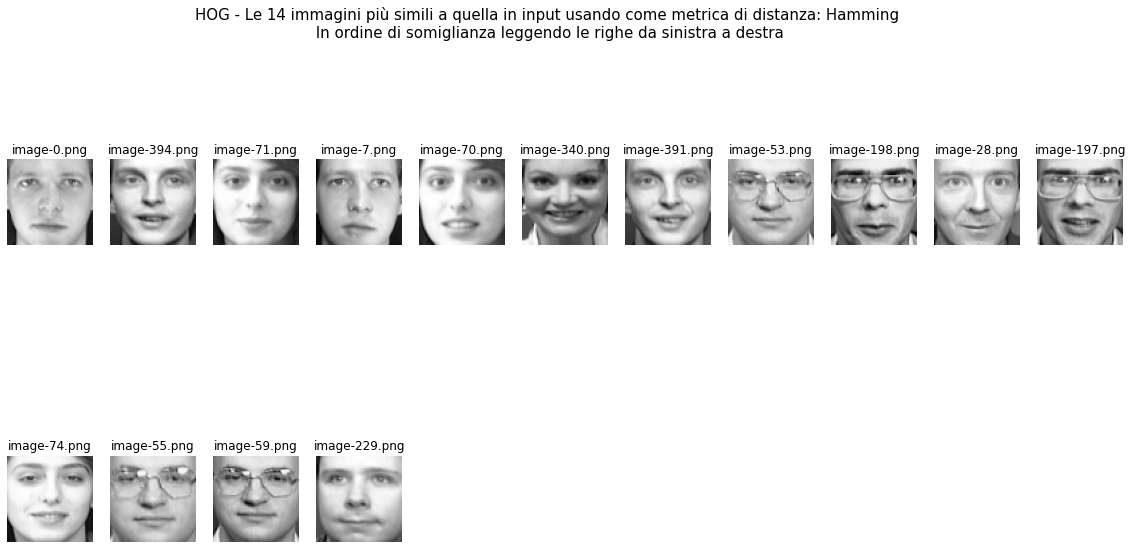

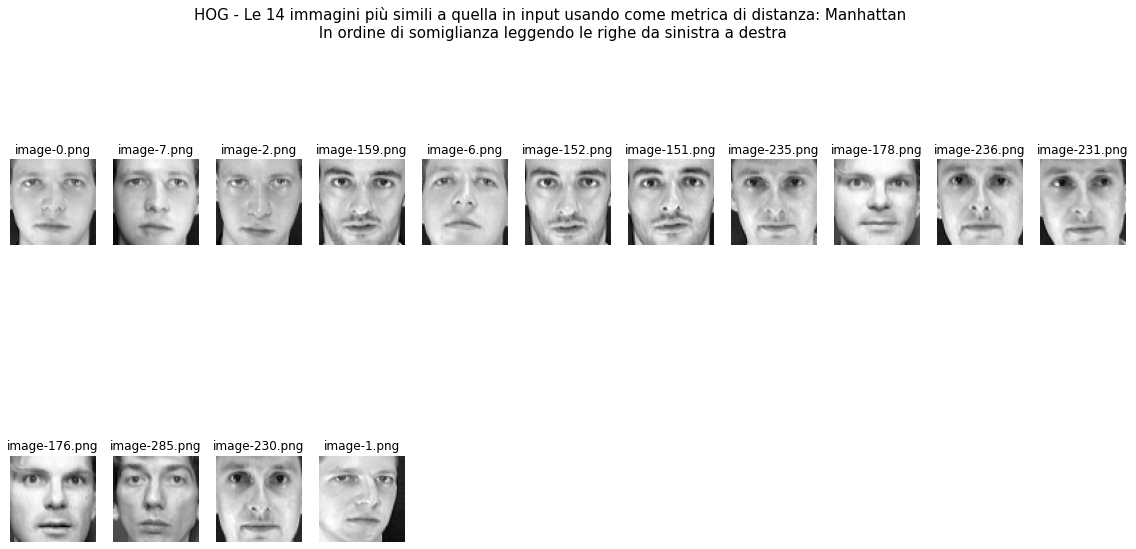

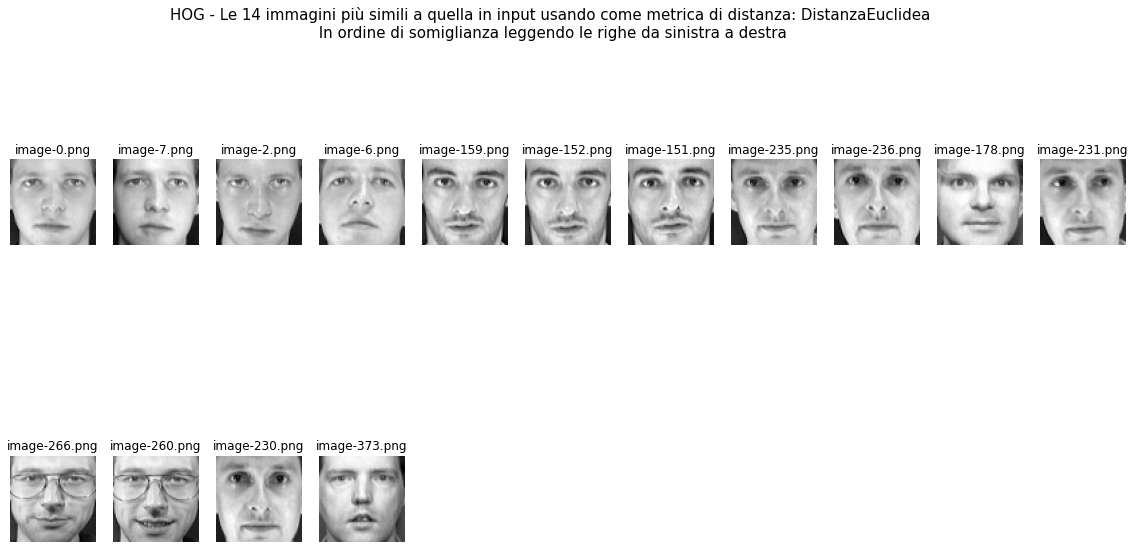

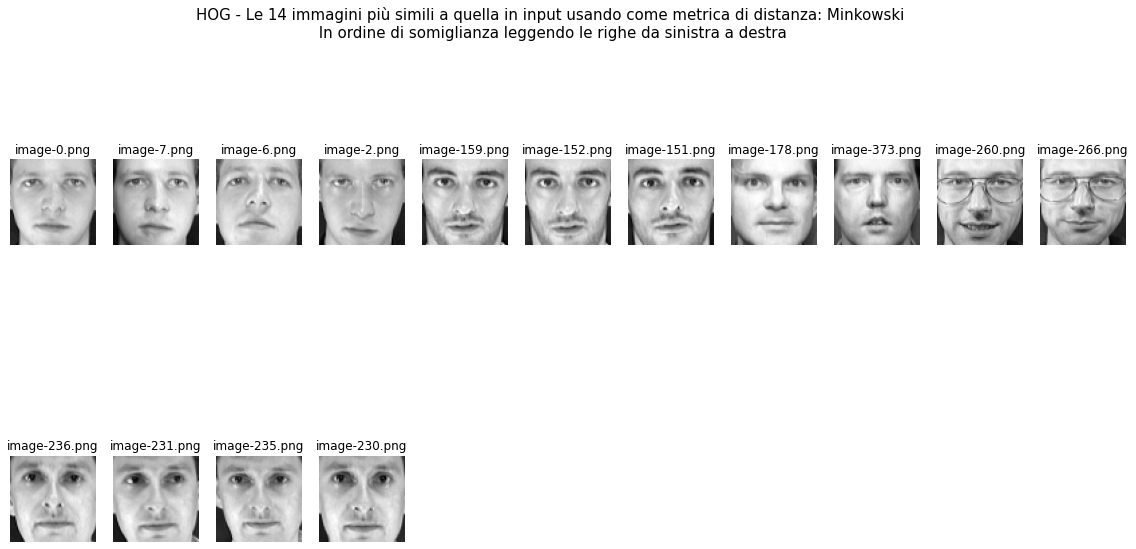

In [29]:
import math
# numero di immagini simili che vogliamo ottenere
k = 14

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)


for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('HOG - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i] + '\n In ordine di somiglianza leggendo le righe da sinistra a destra', fontsize=15)
    # plt.axis('off')
    currentIndex = 1

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'HOG', distanceMetrics[i])
    #print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, currentIndex)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()


### Test recupero K immagini più simili a quella in input usando i Color Moments e la distanza passata in input

In [30]:
# kSimilarImagesOfHOG = getKsimilarImages('image-0.png', 10, 'HOG', 'Minkowski')

# for i in range(0, len(kSimilarImagesOfHOG)):
#     print("Nome dell'immagine: ", kSimilarImagesOfHOG[i][0])
#     print("HOG features dell'immagine: ", dictionaryOfHOGDescriptors[imageName])
#     print("Distanza dall'immagine in input: ", kSimilarImagesOfHOG[i][1])

#     imageName = kSimilarImagesOfHOG[i][0]
#     # load the image
#     image = Image.open('./olivetti_PNG_master/images/' + imageName)
#     # convert image to numpy array
#     # data = asarray(image)

#     # display the array of pixels as an image
#     # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
#     pyplot.imshow(image, cmap='gray')
#     pyplot.show()